<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/Flair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# flair를 불러오자.
flair는 LSTM 기반의 감정분류기로, IMDB 데이터를 사용하여 pre_trained 되어 있다
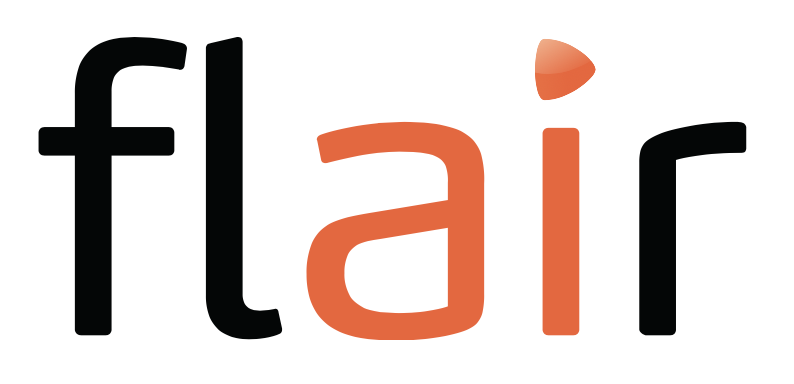

In [1]:
!pip install flair
from flair.models import TextClassifier
from flair.data import Sentence; import pandas as pd
classifier = TextClassifier.load('en-sentiment')

!git clone https://github.com/hongjai-rhee/public.git

     |████████████████████████████████| 143kB 22.9MB/s 
     |████████████████████████████████| 798kB 38.8MB/s 
     |████████████████████████████████| 235kB 45.9MB/s 
     |████████████████████████████████| 1.0MB 49.3MB/s 
     |████████████████████████████████| 481kB 57.0MB/s 
     |████████████████████████████████| 1.0MB 38.3MB/s 
     |████████████████████████████████| 870kB 63.7MB/s 
     |████████████████████████████████| 3.1MB 55.0MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=af2124642eaebe7f8d1264cc6fa3b6103a0094cea0299125d5298fe9360a874c
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993459 sha256=8223ad110110ce94c9da6667f55b08c138788ecc32029d0cdab0e0630e5f3a9e
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
  Created wheel for sqlitedict

2020-02-12 01:09:01,198 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/models-v0.4/classy-imdb-en-rnn-cuda%3A0/imdb-v0.4.pt not found in cache, downloading to /tmp/tmp1cc198aw


100%|██████████| 1501979561/1501979561 [02:41<00:00, 9317046.63B/s] 

2020-02-12 01:11:43,089 copying /tmp/tmp1cc198aw to cache at /root/.flair/models/imdb-v0.4.pt


2020-02-12 01:11:48,391 removing temp file /tmp/tmp1cc198aw
2020-02-12 01:11:48,589 loading file /root/.flair/models/imdb-v0.4.pt
Cloning into 'public'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 435 (delta 32), reused 37 (delta 11), pack-reused 353
Receiving objects: 100% (435/435), 28.61 MiB | 29.09 MiB/s, done.
Resolving deltas: 100% (210/210), done.


# 사전처리된 25000개의 imdb 영화 리뷰를 불러오자.
이 데이터는 Kaggle 튜토리얼에서 제공된 것으로, 특수문자 등이 제외되어 있다.

In [2]:

review=pd.read_csv('/content/public/imdb25000_processed.csv')
review.head

<bound method NDFrame.head of           id                                             review
0          0  with all this stuff going down at the moment w...
1          1  the classic war of the worlds by timothy hines...
2          2  the film starts with a manager nicholas bell g...
3          3  it must be assumed that those who praised this...
4          4  superbly trashy and wondrously unpretentious s...
...      ...                                                ...
24995  24995  it seems like more consideration has gone into...
24996  24996  i don t believe they made this film completely...
24997  24997  guy is a loser can t get girls needs to build ...
24998  24998  this minute documentary bu uel made in the ear...
24999  24999  i saw this movie as a child and it broke my he...

[25000 rows x 2 columns]>

# 감성 판별하기

In [3]:
 
sentence = Sentence('review[0]')
classifier.predict(sentence)
print('Sentence above is: ', sentence.labels)

sentence = Sentence('review[10]')
classifier.predict(sentence)
print('Sentence above is: ', sentence.labels)

sentence = Sentence('review[150]')
classifier.predict(sentence)
print('Sentence above is: ', sentence.labels)

Sentence above is:  [NEGATIVE (0.56246018409729)]
Sentence above is:  [POSITIVE (0.7502961158752441)]
Sentence above is:  [NEGATIVE (0.6812869906425476)]


# 실제 레이블과 얼마나 일치하는지 살펴보자
이 작업을 통해 flair 분류기의 성능을 demonstrate

In [4]:
label=pd.read_csv('/content/public/label25000.csv')   ## 1=positive, 0=negative
label.head

<bound method NDFrame.head of        positive=1
0               1
1               1
2               0
3               0
4               1
...           ...
24995           0
24996           0
24997           0
24998           0
24999           1

[25000 rows x 1 columns]>